In [1760]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1761]:
data=pd.read_csv(os.getcwd()+'/data/ex2data2.txt',header=None,names=['Test1','Test2','Accepted'])
testdata=data['Test2']
positive=data[data['Accepted'].isin([1])]
negative=data[data['Accepted'].isin([0])]
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


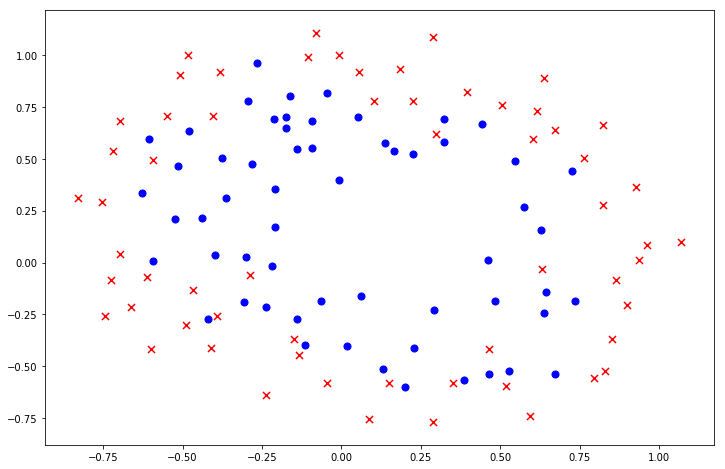

In [1762]:
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')  

In [1763]:
degree = 8
data2=data
x1 = data2['Test1']  
x2 = data2['Test2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):  
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test1', axis=1, inplace=True)  
data2.drop('Test2', axis=1, inplace=True)

data2.head()  

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,...,F63,F64,F65,F70,F71,F72,F73,F74,F75,F76
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,...,0.000046,0.000629,0.008589,9.308192e-10,1.270142e-08,1.733163e-07,0.000002,0.000032,0.000440,0.006009
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,...,-0.000256,0.001893,-0.013981,-5.901130e-08,4.358241e-07,-3.218751e-06,0.000024,-0.000176,0.001297,-0.009576
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,...,-0.003238,0.010488,-0.033973,-2.035982e-05,6.594958e-05,-2.136241e-04,0.000692,-0.002241,0.007260,-0.023518
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,...,-0.006679,0.008944,-0.011978,-1.042843e-03,1.396547e-03,-1.870219e-03,0.002505,-0.003354,0.004492,-0.006015
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,...,-0.013650,0.012384,-0.011235,-9.382157e-03,8.511851e-03,-7.722277e-03,0.007006,-0.006356,0.005766,-0.005232


In [1764]:
cols=data2.shape[1]
train=data2.iloc[:,1:cols]
train.insert(2,'Test2',testdata)
y=data2.iloc[:,0:1]
theta=np.matrix(np.zeros(train.shape[1]))
tr=train
train.head()

,Ones,F10,Test2,F20,F21,F30,F31,F32,F40,F41,...,F63,F64,F65,F70,F71,F72,F73,F74,F75,F76
0,1,0.051267,0.69956,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,...,0.000046,0.000629,0.008589,9.308192e-10,1.270142e-08,1.733163e-07,0.000002,0.000032,0.000440,0.006009
1,1,-0.092742,0.68494,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,...,-0.000256,0.001893,-0.013981,-5.901130e-08,4.358241e-07,-3.218751e-06,0.000024,-0.000176,0.001297,-0.009576
2,1,-0.213710,0.69225,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,...,-0.003238,0.010488,-0.033973,-2.035982e-05,6.594958e-05,-2.136241e-04,0.000692,-0.002241,0.007260,-0.023518
3,1,-0.375000,0.50219,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,...,-0.006679,0.008944,-0.011978,-1.042843e-03,1.396547e-03,-1.870219e-03,0.002505,-0.003354,0.004492,-0.006015
4,1,-0.513250,0.46564,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,...,-0.013650,0.012384,-0.011235,-9.382157e-03,8.511851e-03,-7.722277e-03,0.007006,-0.006356,0.005766,-0.005232


In [1765]:

train=np.matrix(train.values)
y=np.matrix(y.values)
train

matrix([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
           3.22710867e-05,   4.40352691e-04,   6.00879959e-03],
        [  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          -1.75565626e-04,   1.29662850e-03,  -9.57616530e-03],
        [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          -2.24143625e-03,   7.26046625e-03,  -2.35181216e-02],
        ..., 
        [  1.00000000e+00,  -4.84450000e-01,   9.99270000e-01, ...,
          -1.13364813e-01,   2.33836427e-01,  -4.82331978e-01],
        [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          -2.53664185e-07,   4.00036314e-05,  -6.30869717e-03],
        [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
           2.22360353e-07,  -1.07593379e-08,   5.20611480e-10]])

In [1766]:
def sigmoid(z):
 return 1/(1+(np.exp(-z)))

In [1767]:
def computecost(x,y,theta,lam):
    hx=sigmoid(x*theta.T)
    term1=np.multiply(-y,np.log(hx))
    term2=np.multiply((1-y),np.log(1-hx))
    
    reg=(lam/(2*(len(x))))*(np.sum(np.power(theta[:,1:theta.shape[1]],2)))
    jtheta=(np.sum(term1-term2)/len(x))+reg
    return jtheta

In [1768]:
computecost(train,y,theta,1)

0.6931471805599454

In [1769]:
def gradientdecent(train,y,theta,lam,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape[1]))
    parameters=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(sigmoid(train*theta.T)-y)
        
        for j in range(parameters):
            term = np.multiply(error, train[:,j])
            if(j==0):
                temp[0,j]=temp[0,j]-(alpha/(len(train)))*np.sum(term)
            else:
                temp[0,j]=temp[0,j]-alpha/len(train)*(np.sum(term)+lam*(theta[:,j]))
                
       #*(+(np.sum(lam/len(train)*(theta[:,j])))) 
        theta=temp
        cost[i]=computecost(train,y,theta,lam)
    return theta , cost 

In [1770]:
lam=0.001
alpha=0.9
iters=2000
t,c=gradientdecent(train,y,theta,lam,alpha,iters)

In [1771]:
computecost(train,y,t,lam)

0.48594751969804162

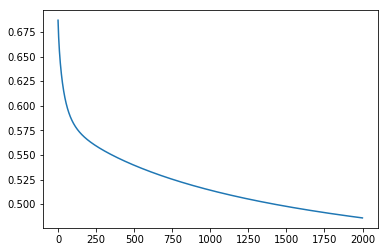

In [1772]:
plt.plot(np.arange(iters),c)

In [1773]:
def predict(theta, testmatrix):  
    probability = sigmoid( testmatrix* theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = t
predictions = predict(theta_min, train)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print 'accuracy = {0}%'.format(accuracy)

tr.insert(0,'predicted',predictions)


accuracy = 89%


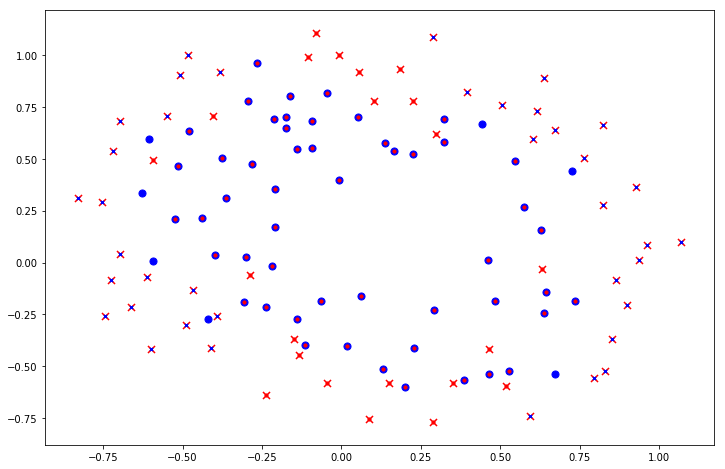

In [1774]:
positive1=tr[tr['predicted'].isin([1])]
negative1=tr[tr['predicted'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.scatter(positive1['F10'], positive1['Test2'], s=10,c='r',marker='o', label='Admitted(Predicted)')  
ax.scatter(negative1['F10'], negative1['Test2'], s=10,c='b',marker='x', label='Not Admitted(Predicted)')